### Student Information
Name: 魏士勛

Student ID: 114062587

GitHub ID: welly2140

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [24]:
### Begin Assignment Here
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
# Load dataset
df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")
df = df[['text', 'label']]
df

,text,label
0,Calls on retards,-1.0
1,Stunt as in like why did they even make a big ...,0.0
2,Seeing lots of red in the ticker.,0.0
3,Vision Marine Technologies Inc. is rewriting t...,1.0
4,He didn’t say thank you.,-1.0
...,...,...
842,Invest now it is going to shoot up tomorrow,1.0
843,Where can I read this?,0.0
844,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.0
845,i sold my puts so i expect cheeto to declare w...,-1.0


In [26]:
# Basic info
print(df.shape)      # number of rows and columns
print(df['label'].value_counts())   # distribution of sentiment
df.isnull().sum()            # check missing values

(847, 2)
label
 0.0    423
-1.0    315
 1.0    109
Name: count, dtype: int64


text     0
label    0
dtype: int64

In [27]:
# Sampling
df_sample = df.sample(n = 100, random_state = 42)
df_sample

,text,label
457,"""We"" who?",0.0
342,Chicken jockey,0.0
280,Not great Bob,-1.0
275,"Speak for yourself, my wife is being harder on...",0.0
843,Where can I read this?,0.0
...,...,...
137,Why is he signing his tweets like he's quoting...,-1.0
299,Fairly,0.0
360,"My day trading: Watching TBBB, COIN and PLTR. ...",-1.0
76,Americans are so brain dead lol,-1.0


In [28]:
# CountVectorizer to build term-document matrix
count_vect = CountVectorizer(stop_words = "english", max_features = 2000) 
X_counts = count_vect.fit_transform(df_sample['text'])
X_counts.shape

(100, 988)

In [29]:
# Example: check vocab
count_vect.get_feature_names_out()[:20]

array(['000', '02', '03', '10', '100', '10yr', '11', '125', '13', '15',
       '17', '17th', '20', '200', '200k', '2025', '21', '22', '22rate',
       '23'], dtype=object)

In [30]:
# Check term frequency distribution
term_freq = np.asarray(X_counts.sum(axis = 0)).ravel()
top_idx = term_freq.argsort()[-20 : ]  # top 20 frequent terms
top_terms = [count_vect.get_feature_names_out()[i] for i in top_idx]
top_terms

['time',
 'right',
 'think',
 'don',
 'sell',
 'silver',
 'growth',
 'charging',
 'evgo',
 'ev',
 'won',
 'just',
 'china',
 'money',
 'trading',
 'company',
 'market',
 'trump',
 'tariffs',
 'like']

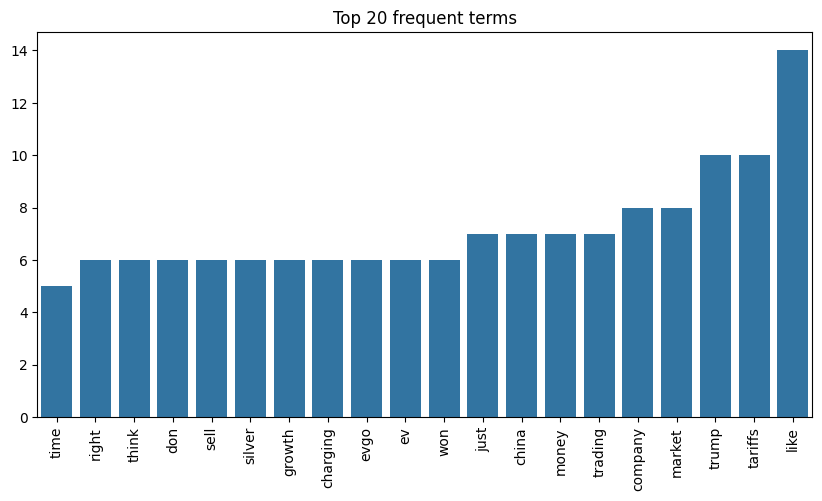

In [31]:
# Plot bar chart of top 20 frequent terms chart
plt.figure(figsize=(10, 5))
sns.barplot(x = top_terms, y = term_freq[top_idx])
plt.xticks(rotation = 90)
plt.title("Top 20 frequent terms")
plt.show()

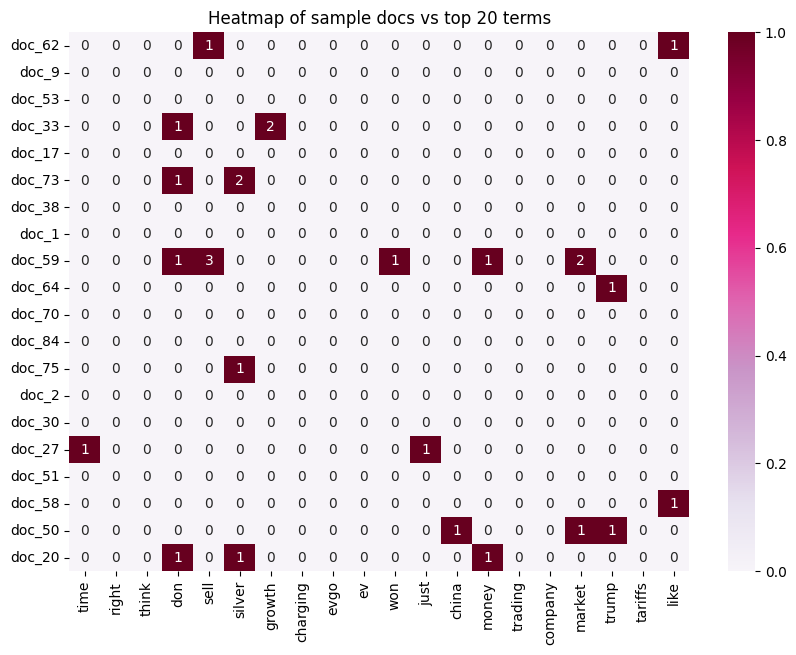

In [32]:
# Plot heatmap of documents vs top 20 frequent terms
docs_idx = np.random.choice(X_counts.shape[0], 20, replace = False)
plot_z = X_counts[docs_idx, :][:, top_idx].toarray()
plot_y = [f"doc_{i}" for i in docs_idx]

df_todraw = pd.DataFrame(plot_z, columns = top_terms, index = plot_y)
plt.figure(figsize = (10, 7))
sns.heatmap(df_todraw, cmap = "PuRd", vmin = 0, vmax = 1, annot = True)
plt.title("Heatmap of sample docs vs top 20 terms")
plt.show()

# Phase 2

In [ ]:
### Begin Assignment Here